## Computational Drug Discovery - Exploratory Data Analysis

In this Jupyter notebook, I will be building a machine learning model using the ChEMBL bioactivity data.

In **Part 2**, I will be performing Descriptor Calculation and Exploratory Data Analysis. 

---

## Load bioactivity data

In [2]:
import pandas as pd

In [3]:
df = pd.read_csv('data/beta_secretase_bioactivity_data_curated.csv')

In [4]:
df.head(5)

,Unnamed: 0,molecule_chembl_id,canonical_smiles,standard_value,class
0,0,CHEMBL406146,CC(C)C[C@H](NC(=O)[C@@H](NC(=O)[C@@H](N)CCC(=O...,413.0,active
1,1,CHEMBL78946,CC(C)C[C@H](NC(=O)[C@H](CC(N)=O)NC(=O)[C@@H](N...,2.0,active
2,2,CHEMBL324109,CCC(C)C[C@H](NC(=O)[C@H](CC(C)C)NC(C)=O)[C@@H]...,460.0,active
3,3,CHEMBL114147,CC(=O)NCC(=O)N[C@@H](Cc1ccccc1)[C@@H](O)CC(=O)...,9000.0,intermediate
4,4,CHEMBL419949,CC(=O)N[C@@H](Cc1ccccc1)C(=O)N[C@@H](Cc1ccccc1...,5600.0,intermediate


## Calculate Lipinski descriptors

Christopher Lipinski, a scientist at Pfizer, came up with a set of rule-of-thumb for evaluating the **druglikeness** of compounds. Such druglikeness is based on the Absorption, Distribution, Metabolism and Excretion (ADME) that is also known as the pharmacokinetic profile. Lipinski analyzed all orally active FDA-approved drugs in the formulation of what is to be known as the **Rule-of-Five** or **Lipinski's Rule**.

The Lipinski's Rule stated the following:

- Molecular weight < 500 Dalton
- Octanol-water partition coefficient (LogP) < 5
- Hydrogen bond donors < 5
- Hydrogen bond acceptors < 10

### Import libraries

In [5]:
import numpy as np
from rdkit import Chem
from rdkit.Chem import Descriptors, Lipinski

### Calculate descriptors

In [6]:
# inspired by: https://codeocean.com/explore/capsules?query=tag:data-curation

# function that takes smiles notation...
# which is chemical information that tells the exact atomic details of the molecule

def lipinski(smiles, verbose=False):
    
    moldata = []
    for elem in smiles:
        mol = Chem.MolFromSmiles(elem) 
        moldata.append(mol)
        
    baseData= np.arange(1,1)
   
    i = 0  
    for mol in moldata:        
        desc_MolWt = Descriptors.MolWt(mol)
        desc_MolLogP = Descriptors.MolLogP(mol)
        desc_NumHDonors = Lipinski.NumHDonors(mol)
        desc_NumHAcceptors = Lipinski.NumHAcceptors(mol)
        row = np.array([desc_MolWt,
                        desc_MolLogP,
                        desc_NumHDonors,
                        desc_NumHAcceptors])   
        if(i == 0):
            baseData = row
        else:
            baseData = np.vstack([baseData, row])
        i = i + 1      
    
    columnNames=["MW","LogP","NumHDonors","NumHAcceptors"]   
    descriptors = pd.DataFrame(data = baseData, columns = columnNames)
    
    return descriptors

In [7]:
df_lipinski = lipinski(df.canonical_smiles)

### Combine Dataframes

In [8]:
# lipinski data frame containing:
# MW (molecular weight) which tells us size, 
# LogP which tells us solubility,
# NumHDonors which tells us relative number of hyodrogen bond donors
# NumHAcceptors which tells us relative number of hyodrogen bond acceptors
df_lipinski

,MW,LogP,NumHDonors,NumHAcceptors
0,999.085,-1.4355,13.0,13.0
1,893.005,-1.7361,12.0,12.0
2,751.988,2.3535,8.0,9.0
3,737.895,1.9626,8.0,8.0
4,828.020,3.5739,8.0,8.0
...,...,...,...,...
7229,623.861,2.3125,7.0,8.0
7230,637.888,2.7026,7.0,8.0
7231,651.915,3.0927,7.0,8.0
7232,556.176,6.7284,3.0,5.0


In [9]:
df

,Unnamed: 0,molecule_chembl_id,canonical_smiles,standard_value,class
0,0,CHEMBL406146,CC(C)C[C@H](NC(=O)[C@@H](NC(=O)[C@@H](N)CCC(=O...,413.0,active
1,1,CHEMBL78946,CC(C)C[C@H](NC(=O)[C@H](CC(N)=O)NC(=O)[C@@H](N...,2.0,active
2,2,CHEMBL324109,CCC(C)C[C@H](NC(=O)[C@H](CC(C)C)NC(C)=O)[C@@H]...,460.0,active
3,3,CHEMBL114147,CC(=O)NCC(=O)N[C@@H](Cc1ccccc1)[C@@H](O)CC(=O)...,9000.0,intermediate
4,4,CHEMBL419949,CC(=O)N[C@@H](Cc1ccccc1)C(=O)N[C@@H](Cc1ccccc1...,5600.0,intermediate
...,...,...,...,...,...
7229,10419,CHEMBL4849016,CC[C@H](C)[C@H](NC(=O)[C@@H](N)CCC(=O)O)C(=O)N...,4400.0,intermediate
7230,10420,CHEMBL4872824,CC[C@H](C)[C@H](NC(=O)[C@@H](N)CCC(=O)O)C(=O)N...,9200.0,intermediate
7231,10421,CHEMBL4853052,CC[C@H](C)[C@H](NC(=O)[C@@H](N)CCC(=O)O)C(=O)N...,10000.0,inactive
7232,10424,CHEMBL4862716,CC1=CC2Cc3nc4cc(Cl)ccc4c(NCCCCCCCCCNS(=O)(=O)c...,10800.0,inactive


In [10]:
df_combined = pd.concat([df, df_lipinski], axis = 1)
df_combined

,Unnamed: 0,molecule_chembl_id,canonical_smiles,standard_value,class,MW,LogP,NumHDonors,NumHAcceptors
0,0,CHEMBL406146,CC(C)C[C@H](NC(=O)[C@@H](NC(=O)[C@@H](N)CCC(=O...,413.0,active,999.085,-1.4355,13.0,13.0
1,1,CHEMBL78946,CC(C)C[C@H](NC(=O)[C@H](CC(N)=O)NC(=O)[C@@H](N...,2.0,active,893.005,-1.7361,12.0,12.0
2,2,CHEMBL324109,CCC(C)C[C@H](NC(=O)[C@H](CC(C)C)NC(C)=O)[C@@H]...,460.0,active,751.988,2.3535,8.0,9.0
3,3,CHEMBL114147,CC(=O)NCC(=O)N[C@@H](Cc1ccccc1)[C@@H](O)CC(=O)...,9000.0,intermediate,737.895,1.9626,8.0,8.0
4,4,CHEMBL419949,CC(=O)N[C@@H](Cc1ccccc1)C(=O)N[C@@H](Cc1ccccc1...,5600.0,intermediate,828.020,3.5739,8.0,8.0
...,...,...,...,...,...,...,...,...,...
7229,10419,CHEMBL4849016,CC[C@H](C)[C@H](NC(=O)[C@@H](N)CCC(=O)O)C(=O)N...,4400.0,intermediate,623.861,2.3125,7.0,8.0
7230,10420,CHEMBL4872824,CC[C@H](C)[C@H](NC(=O)[C@@H](N)CCC(=O)O)C(=O)N...,9200.0,intermediate,637.888,2.7026,7.0,8.0
7231,10421,CHEMBL4853052,CC[C@H](C)[C@H](NC(=O)[C@@H](N)CCC(=O)O)C(=O)N...,10000.0,inactive,651.915,3.0927,7.0,8.0
7232,10424,CHEMBL4862716,CC1=CC2Cc3nc4cc(Cl)ccc4c(NCCCCCCCCCNS(=O)(=O)c...,10800.0,inactive,556.176,6.7284,3.0,5.0


### Convert IC50 to pIC50

To allow **IC50** data to be more uniformly distributed, I will convert **IC50** to the negative logarithmic scale which is essentially **-log10(IC50)**.

This custom function pIC50() will accept a DataFrame as input and will:

- Take the IC50 values from the <mark>standard_value</mark> column and converts it from nM to M by multiplying the value by $10^{-9}$
- Take the molar value and apply -log10
- Delete the <mark>standard_value</mark> column and create a new <mark>pIC50</mark> column

In [11]:
def pIC50(input):
    pIC50 = []
    
    for i in input['standard_value_norm']:
        molar = i*(10**-9) # converts nM (nanomolar) to M (molar)
        pIC50.append(-np.log10(molar))

    input['pIC50'] = pIC50
    x = input.drop('standard_value_norm', 1)
        
    return x

Note: Values greater than 100,000,000 will be fixed at 100,000,000 otherwise the negative logarithmic value will become negative.



In [20]:
df_combined.standard_value.describe()

count    7.234000e+03
mean     4.157136e+04
std      1.113669e+06
min      2.000000e-04
25%      2.920000e+01
50%      2.637500e+02
75%      3.300000e+03
max      8.600000e+07
Name: standard_value, dtype: float64

In [21]:
-np.log10( (10**-9)* 100000000)

1.0

In [22]:
-np.log10( (10**-9)* 10000000000 )

-1.0

In [23]:
def norm_value(input):
    norm = []
    
    for i in input['standard_value']:
        if i > 100000000:
            i = 100000000 
        norm.append(i)
        
    input['standard_value_norm'] = norm
    x = input.drop('standard_value', 1)
    
    return x

In [24]:
# apply so that values in standard_value are normalized
df_norm = norm_value(df_combined)
df_norm

/Users/kiannahendricks/opt/anaconda3/envs/rdkit-env-test/lib/python3.7/site-packages/ipykernel_launcher.py:10: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  # Remove the CWD from sys.path while we load stuff.


,Unnamed: 0,molecule_chembl_id,canonical_smiles,class,MW,LogP,NumHDonors,NumHAcceptors,standard_value_norm
0,0,CHEMBL406146,CC(C)C[C@H](NC(=O)[C@@H](NC(=O)[C@@H](N)CCC(=O...,active,999.085,-1.4355,13.0,13.0,413.0
1,1,CHEMBL78946,CC(C)C[C@H](NC(=O)[C@H](CC(N)=O)NC(=O)[C@@H](N...,active,893.005,-1.7361,12.0,12.0,2.0
2,2,CHEMBL324109,CCC(C)C[C@H](NC(=O)[C@H](CC(C)C)NC(C)=O)[C@@H]...,active,751.988,2.3535,8.0,9.0,460.0
3,3,CHEMBL114147,CC(=O)NCC(=O)N[C@@H](Cc1ccccc1)[C@@H](O)CC(=O)...,intermediate,737.895,1.9626,8.0,8.0,9000.0
4,4,CHEMBL419949,CC(=O)N[C@@H](Cc1ccccc1)C(=O)N[C@@H](Cc1ccccc1...,intermediate,828.020,3.5739,8.0,8.0,5600.0
...,...,...,...,...,...,...,...,...,...
7229,10419,CHEMBL4849016,CC[C@H](C)[C@H](NC(=O)[C@@H](N)CCC(=O)O)C(=O)N...,intermediate,623.861,2.3125,7.0,8.0,4400.0
7230,10420,CHEMBL4872824,CC[C@H](C)[C@H](NC(=O)[C@@H](N)CCC(=O)O)C(=O)N...,intermediate,637.888,2.7026,7.0,8.0,9200.0
7231,10421,CHEMBL4853052,CC[C@H](C)[C@H](NC(=O)[C@@H](N)CCC(=O)O)C(=O)N...,inactive,651.915,3.0927,7.0,8.0,10000.0
7232,10424,CHEMBL4862716,CC1=CC2Cc3nc4cc(Cl)ccc4c(NCCCCCCCCCNS(=O)(=O)c...,inactive,556.176,6.7284,3.0,5.0,10800.0


In [25]:
df_norm.standard_value_norm.describe()

count    7.234000e+03
mean     4.157136e+04
std      1.113669e+06
min      2.000000e-04
25%      2.920000e+01
50%      2.637500e+02
75%      3.300000e+03
max      8.600000e+07
Name: standard_value_norm, dtype: float64

In [26]:
df_final = pIC50(df_norm)
df_final

/Users/kiannahendricks/opt/anaconda3/envs/rdkit-env-test/lib/python3.7/site-packages/ipykernel_launcher.py:9: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  if __name__ == '__main__':


,Unnamed: 0,molecule_chembl_id,canonical_smiles,class,MW,LogP,NumHDonors,NumHAcceptors,pIC50
0,0,CHEMBL406146,CC(C)C[C@H](NC(=O)[C@@H](NC(=O)[C@@H](N)CCC(=O...,active,999.085,-1.4355,13.0,13.0,6.384050
1,1,CHEMBL78946,CC(C)C[C@H](NC(=O)[C@H](CC(N)=O)NC(=O)[C@@H](N...,active,893.005,-1.7361,12.0,12.0,8.698970
2,2,CHEMBL324109,CCC(C)C[C@H](NC(=O)[C@H](CC(C)C)NC(C)=O)[C@@H]...,active,751.988,2.3535,8.0,9.0,6.337242
3,3,CHEMBL114147,CC(=O)NCC(=O)N[C@@H](Cc1ccccc1)[C@@H](O)CC(=O)...,intermediate,737.895,1.9626,8.0,8.0,5.045757
4,4,CHEMBL419949,CC(=O)N[C@@H](Cc1ccccc1)C(=O)N[C@@H](Cc1ccccc1...,intermediate,828.020,3.5739,8.0,8.0,5.251812
...,...,...,...,...,...,...,...,...,...
7229,10419,CHEMBL4849016,CC[C@H](C)[C@H](NC(=O)[C@@H](N)CCC(=O)O)C(=O)N...,intermediate,623.861,2.3125,7.0,8.0,5.356547
7230,10420,CHEMBL4872824,CC[C@H](C)[C@H](NC(=O)[C@@H](N)CCC(=O)O)C(=O)N...,intermediate,637.888,2.7026,7.0,8.0,5.036212
7231,10421,CHEMBL4853052,CC[C@H](C)[C@H](NC(=O)[C@@H](N)CCC(=O)O)C(=O)N...,inactive,651.915,3.0927,7.0,8.0,5.000000
7232,10424,CHEMBL4862716,CC1=CC2Cc3nc4cc(Cl)ccc4c(NCCCCCCCCCNS(=O)(=O)c...,inactive,556.176,6.7284,3.0,5.0,4.966576


In [27]:
df_final.pIC50.describe()

count    7234.000000
mean        6.477377
std         1.391441
min         1.065502
25%         5.481486
50%         6.578808
75%         7.534617
max        12.698970
Name: pIC50, dtype: float64

In [29]:
df_final.to_csv('beta_secretase_bioactivity_data_3class_pIC50.csv')

### Removing the 'intermediate' bioactivity class

I will remove the intermediate class from the data set to allow for simple comparison.

In [30]:
df_2class = df_final[df_final['class'] != 'intermediate']
df_2class

,Unnamed: 0,molecule_chembl_id,canonical_smiles,class,MW,LogP,NumHDonors,NumHAcceptors,pIC50
0,0,CHEMBL406146,CC(C)C[C@H](NC(=O)[C@@H](NC(=O)[C@@H](N)CCC(=O...,active,999.085,-1.43550,13.0,13.0,6.384050
1,1,CHEMBL78946,CC(C)C[C@H](NC(=O)[C@H](CC(N)=O)NC(=O)[C@@H](N...,active,893.005,-1.73610,12.0,12.0,8.698970
2,2,CHEMBL324109,CCC(C)C[C@H](NC(=O)[C@H](CC(C)C)NC(C)=O)[C@@H]...,active,751.988,2.35350,8.0,9.0,6.337242
5,5,CHEMBL116826,CCC(C)C[C@H](NC(=O)[C@H](CC(C)C)NC(C)=O)[C@@H]...,inactive,767.987,1.36900,8.0,9.0,4.468521
6,6,CHEMBL143239,CC(C)[C@H](NC(=O)C[C@H](O)[C@H](Cc1cc(F)cc(F)c...,active,717.722,4.31960,7.0,7.0,7.698970
...,...,...,...,...,...,...,...,...,...
7224,10414,CHEMBL4877632,CC[C@H](C)[C@H](NC(=O)[C@@H](N)CCC(=O)O)C(=O)N...,inactive,675.849,2.28890,7.0,10.0,4.031517
7226,10416,CHEMBL4866494,CC[C@H](C)[C@H](NC(=O)[C@@H](N)CCC(=O)O)C(=O)N...,inactive,675.849,2.50892,8.0,9.0,4.886057
7228,10418,CHEMBL4864653,CC[C@H](C)[C@H](NC(=O)[C@@H](N)CCC(=O)O)C(=O)N...,inactive,671.905,3.38110,7.0,8.0,4.853872
7231,10421,CHEMBL4853052,CC[C@H](C)[C@H](NC(=O)[C@@H](N)CCC(=O)O)C(=O)N...,inactive,651.915,3.09270,7.0,8.0,5.000000


In [31]:
df_2class.to_csv('beta_secretase_bioactivity_data_2class_pIC50.csv')

## Exploratory Data Analysis (Chemical Space Analysis) via Lipinski descriptors

### Import library

In [32]:
import seaborn as sns
sns.set(style = 'ticks')
import matplotlib.pyplot as plt

In [33]:
# create color palette variable
palette = ['#953019', '#9EBC9F']

### Frequency plot of the 2 bioactivity classes

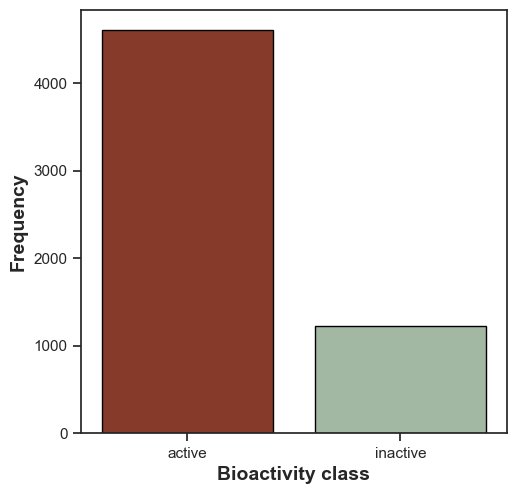

In [34]:
plt.figure(figsize = (5.5, 5.5))

sns.countplot(x = 'class', data = df_2class, edgecolor = 'black', palette = palette)

plt.xlabel('Bioactivity class', fontsize = 14, fontweight = 'bold')
plt.ylabel('Frequency', fontsize = 14, fontweight = 'bold')

plt.savefig('plot_bioactivity_class.pdf')

### Scatter plot of MW versus LogP

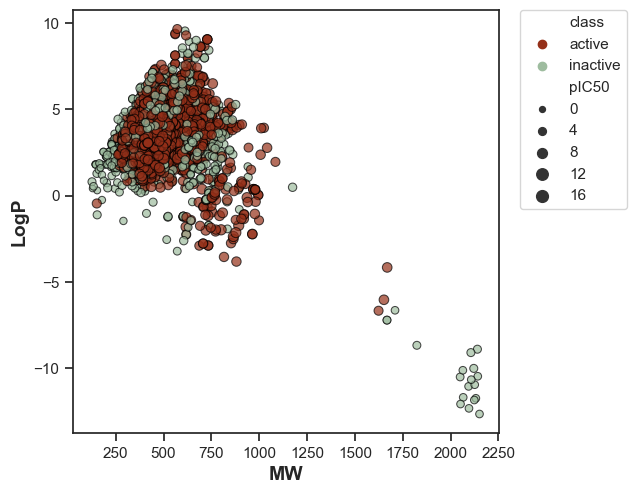

In [35]:
plt.figure(figsize = (5.5, 5.5))

sns.scatterplot(x = 'MW', y = 'LogP', data = df_2class, hue = 'class', size = 'pIC50', edgecolor = 'black', palette = palette, alpha = 0.7)

plt.xlabel('MW', fontsize = 14, fontweight = 'bold')
plt.ylabel('LogP', fontsize = 14, fontweight = 'bold')
plt.legend(bbox_to_anchor = (1.05, 1), loc = 2, borderaxespad = 0)

plt.savefig('plot_MW_vs_LogP.pdf')

### Box plot of pIC50 value

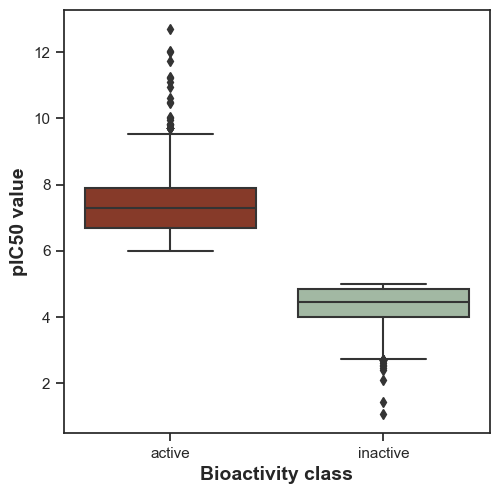

In [36]:
plt.figure(figsize = (5.5, 5.5))

sns.boxplot(x = 'class', y = 'pIC50', data = df_2class, palette = palette)

plt.xlabel('Bioactivity class', fontsize = 14, fontweight = 'bold')
plt.ylabel('pIC50 value', fontsize = 14, fontweight = 'bold')

plt.savefig('plot_ic50.pdf')

### Statistical Analysis: Mann-Whitney U Test

In [37]:
def mannwhitney(descriptor, verbose=False):
  # https://machinelearningmastery.com/nonparametric-statistical-significance-tests-in-python/
    from numpy.random import seed
    from numpy.random import randn
    from scipy.stats import mannwhitneyu

    # seed the random number generator
    seed(1)

    # actives and inactives
    selection = [descriptor, 'class']
    df = df_2class[selection]
    active = df[df['class'] == 'active']
    active = active[descriptor]

    selection = [descriptor, 'class']
    df = df_2class[selection]
    inactive = df[df['class'] == 'inactive']
    inactive = inactive[descriptor]

    # compare samples
    stat, p = mannwhitneyu(active, inactive)

    # interpret
    alpha = 0.05
    if p > alpha:
        interpretation = 'Same distribution (fail to reject H0)'
    else:
        interpretation = 'Different distribution (reject H0)'
  
    results = pd.DataFrame({'Descriptor':descriptor,
                            'Statistics':stat,
                            'p':p,
                            'alpha':alpha,
                            'Interpretation':interpretation}, index=[0])
    filename = 'mannwhitneyu_' + descriptor + '.csv'
    results.to_csv(filename)

    return results

In [38]:
mannwhitney('pIC50')

,Descriptor,Statistics,p,alpha,Interpretation
0,pIC50,5664461.0,0.0,0.05,Different distribution (reject H0)


### MW

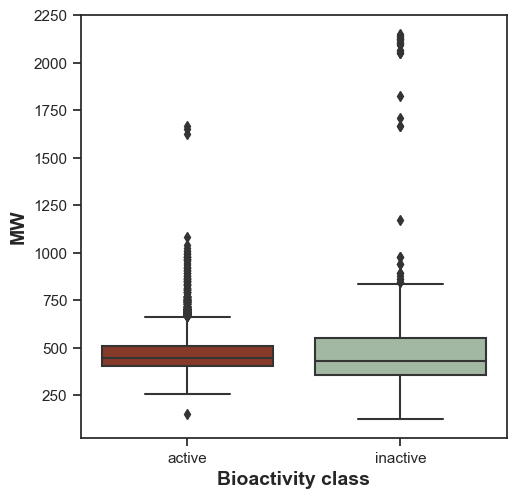

In [39]:

plt.figure(figsize=(5.5, 5.5))

sns.boxplot(x = 'class', y = 'MW', data = df_2class, palette = palette)

plt.xlabel('Bioactivity class', fontsize=14, fontweight='bold')
plt.ylabel('MW', fontsize=14, fontweight='bold')

plt.savefig('plot_MW.pdf')

In [40]:
mannwhitney('MW')

,Descriptor,Statistics,p,alpha,Interpretation
0,MW,3126754.5,2.023387e-08,0.05,Different distribution (reject H0)


### LogP

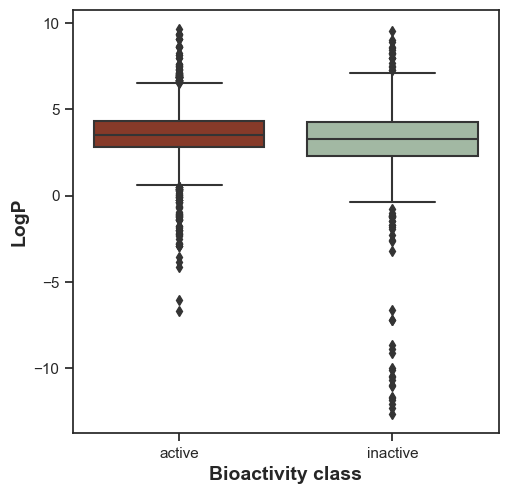

In [41]:

plt.figure(figsize=(5.5, 5.5))

sns.boxplot(x = 'class', y = 'LogP', data = df_2class, palette = palette)

plt.xlabel('Bioactivity class', fontsize=14, fontweight='bold')
plt.ylabel('LogP', fontsize=14, fontweight='bold')

plt.savefig('plot_LogP.pdf')

In [42]:
mannwhitney('LogP')

,Descriptor,Statistics,p,alpha,Interpretation
0,LogP,3142493.0,3.425826e-09,0.05,Different distribution (reject H0)


### NumHDonors

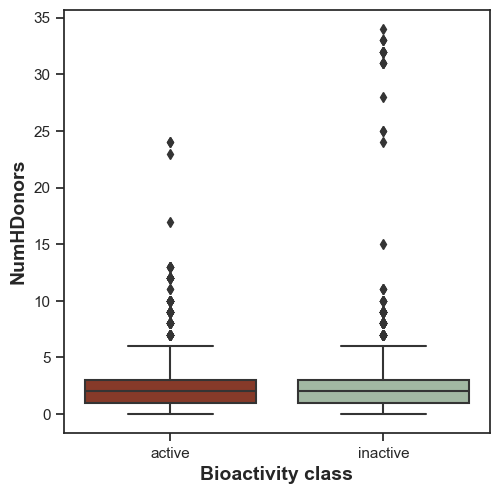

In [43]:
plt.figure(figsize=(5.5, 5.5))

sns.boxplot(x = 'class', y = 'NumHDonors', data = df_2class, palette = palette)

plt.xlabel('Bioactivity class', fontsize=14, fontweight='bold')
plt.ylabel('NumHDonors', fontsize=14, fontweight='bold')

plt.savefig('plot_NumHDonors.pdf')

In [44]:
mannwhitney('NumHDonors')

,Descriptor,Statistics,p,alpha,Interpretation
0,NumHDonors,2595935.0,0.000002,0.05,Different distribution (reject H0)


### NumHAcceptors

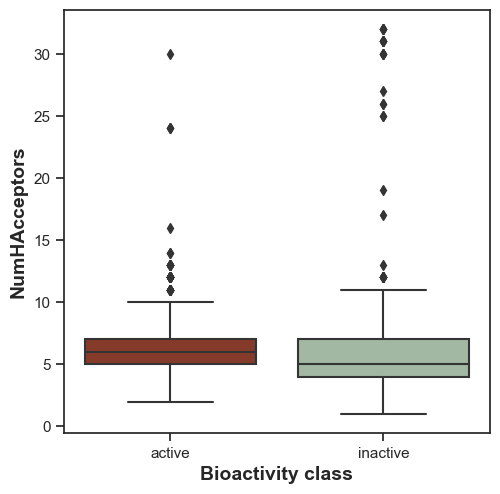

In [45]:
plt.figure(figsize=(5.5, 5.5))

sns.boxplot(x = 'class', y = 'NumHAcceptors', data = df_2class, palette = palette)

plt.xlabel('Bioactivity class', fontsize=14, fontweight='bold')
plt.ylabel('NumHAcceptors', fontsize=14, fontweight='bold')

plt.savefig('plot_NumHAcceptors.pdf')

In [46]:
mannwhitney('NumHAcceptors')

,Descriptor,Statistics,p,alpha,Interpretation
0,NumHAcceptors,3155363.5,3.596305e-10,0.05,Different distribution (reject H0)


### Interpretation of Statistical Results

**Box Plots**

**pIC50**
When looking at the pIC50 values, the actives and inactives displayed a statistically significant difference. This is expected because the threshold values were defined as IC50 < 1,000 nM = Actives while IC50 > 10,000 nM = Inactives. This corresponds to pIC50 > 6 = Actives and pIC50 < 5 = Inactives. 

**Lipinski's descriptors**
ALl of the 4 Lipinski's descriptrs displayed a statisitcally significance difference between actives and inactives.

